In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('linear_data.csv')
df.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


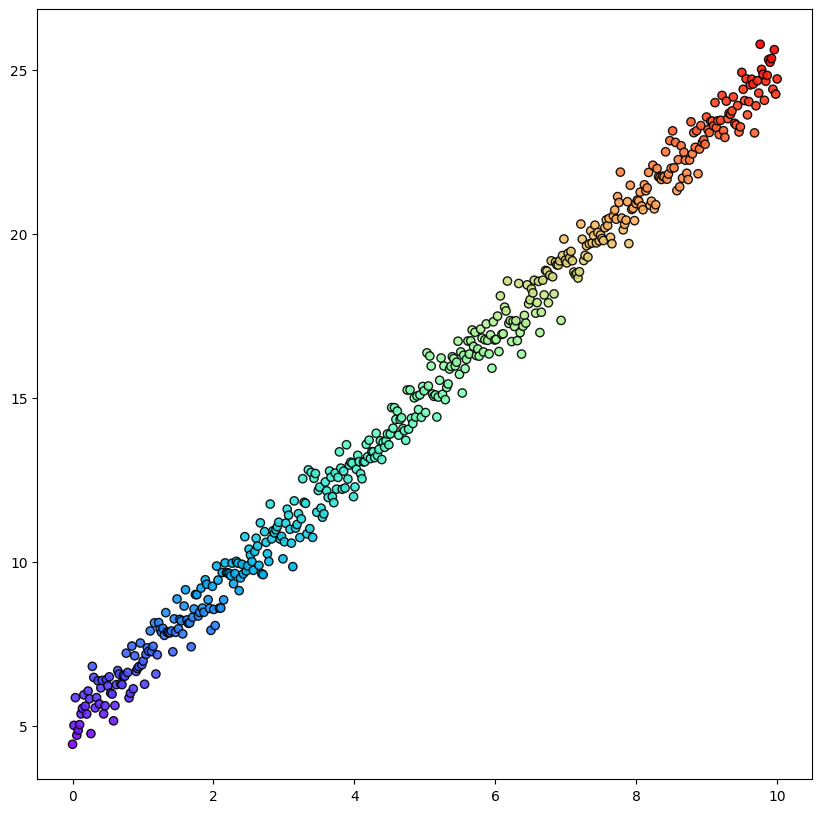

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(
    df[['x']],
    df['y'],
    c= df['y'],
    cmap= 'rainbow',
    alpha = .90,
    edgecolor = 'k',
    label = 'Original'
    )

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [33]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [5]:
df2 = pd.read_csv('nonlinear_data.csv')
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


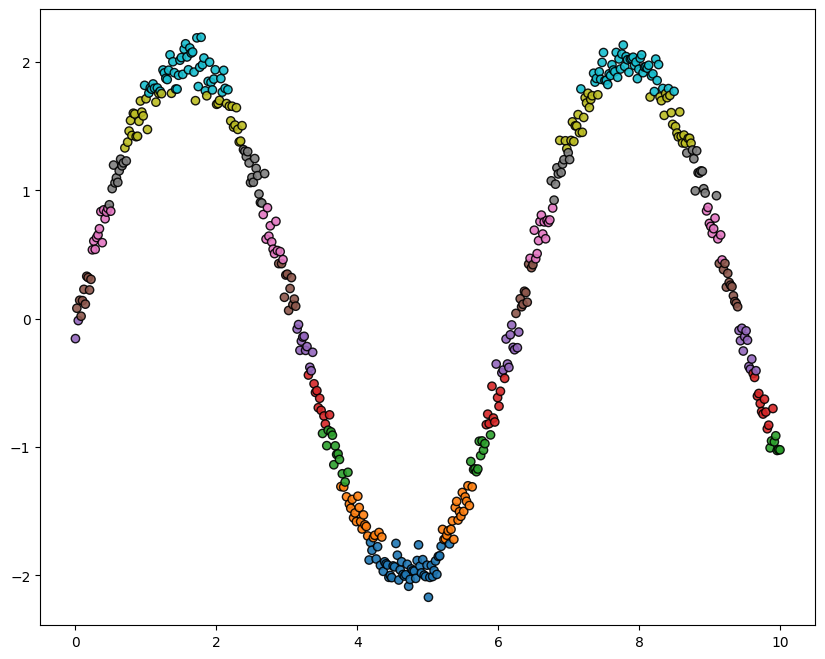

In [45]:
plt.figure(figsize=(10,8))
plt.scatter( 
    df2[['x']],
    df2['y'],
    c = df2['y'],
    cmap = 'tab10',
    alpha = .90,
    edgecolor = 'k',
    label = 'Original'
)

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [47]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


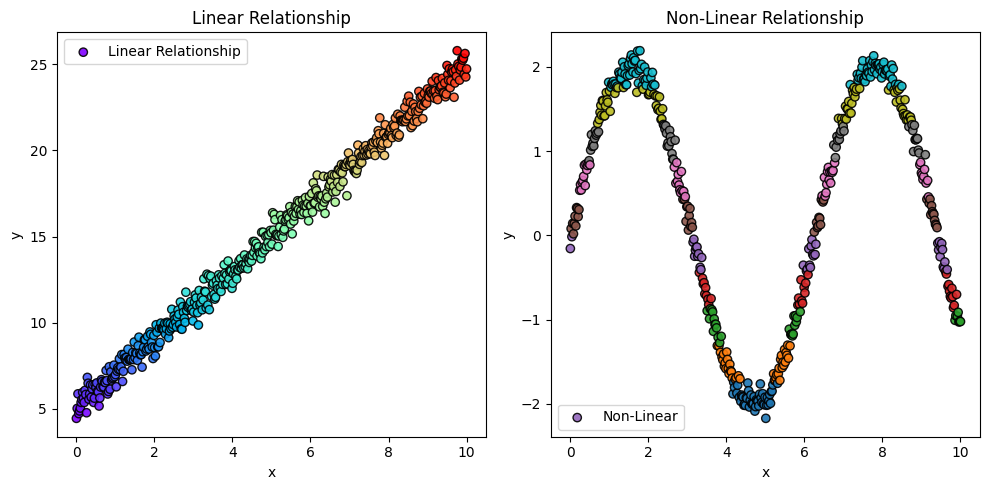

In [63]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.scatter(
    df[['x']],
    df['y'],
    c= df['y'],
    cmap= 'rainbow',
    alpha = .90,
    edgecolor = 'k',
    label = 'Linear Relationship'
    )
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Relationship')
plt.legend()

#non-linear
plt.subplot(1,2,2)
plt.scatter( 
    df2[['x']],
    df2['y'],
    c = df2['y'],
    cmap = 'tab10',
    alpha = .90,
    edgecolor = 'k',
    label = 'Non-Linear'
)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non-Linear Relationship')
plt.legend()

plt.tight_layout()
plt.show()

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
reg1 = LinearRegression()

In [69]:
reg1.fit(df[['x']],df['y'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [70]:
reg1.score(df[['x']], df['y'])

0.9928923730526016

In [71]:
reg2 = LinearRegression()

In [72]:
reg2.fit(df2[['x']],df2['y'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
reg2.score(df2[['x']],df2['y'])

0.004321199719043656

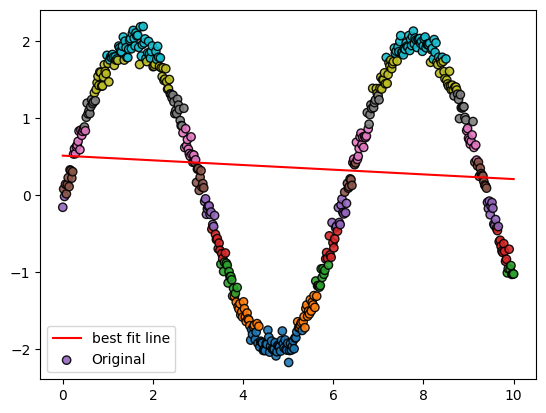

In [81]:
plt.plot(df2[['x']],reg2.predict(df2[['x']]),color='red', label = 'best fit line')
plt.scatter( 
    df2[['x']],
    df2['y'],
    c = df2['y'],
    cmap = 'tab10',
    alpha = .90,
    edgecolor = 'k',
    label = 'Original'
)


plt.legend()
plt.show()

# polynomial regression

In [83]:
from sklearn.preprocessing import PolynomialFeatures

In [96]:
poly = PolynomialFeatures(degree= 4)
x_poly = poly.fit_transform(df2[['x']])

In [97]:
x_poly.shape

(500, 5)

In [98]:
x_poly

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 2.00400802e-02, 4.01604813e-04, 8.04819264e-06,
        1.61286426e-07],
       [1.00000000e+00, 4.00801603e-02, 1.60641925e-03, 6.43855411e-05,
        2.58058281e-06],
       ...,
       [1.00000000e+00, 9.95991984e+00, 9.92000032e+01, 9.88024080e+02,
        9.84064064e+03],
       [1.00000000e+00, 9.97995992e+00, 9.95996000e+01, 9.94000016e+02,
        9.92008032e+03],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02, 1.00000000e+03,
        1.00000000e+04]], shape=(500, 5))

In [99]:
pd.DataFrame(x_poly).head()

,0,1,2,3,4
0,1.0,0.00000,0.000000,0.000000,0.000000e+00
1,1.0,0.02004,0.000402,0.000008,1.612864e-07
2,1.0,0.04008,0.001606,0.000064,2.580583e-06
3,1.0,0.06012,0.003614,0.000217,1.306420e-05
4,1.0,0.08016,0.006426,0.000515,4.128932e-05


In [100]:
df2.x.head()


0    0.00000
1    0.02004
2    0.04008
3    0.06012
4    0.08016
Name: x, dtype: float64

In [101]:
reg_poly = LinearRegression()


In [102]:
reg_poly.fit(x_poly, df2.y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [103]:
reg_poly.score(x_poly, df2.y)

0.9067596910369458

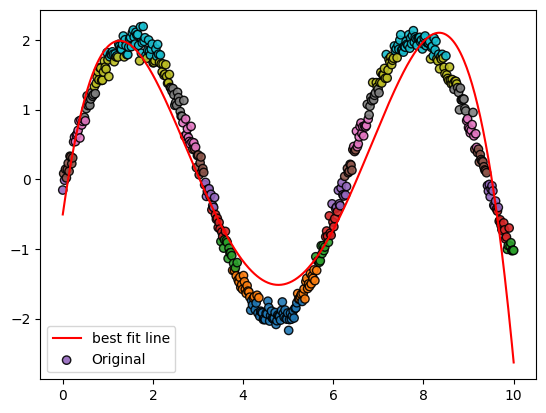

In [104]:
plt.plot(df2[['x']],reg_poly.predict(x_poly),color='red', label = 'best fit line')
plt.scatter( 
    df2[['x']],
    df2['y'],
    c = df2['y'],
    cmap = 'tab10',
    alpha = .90,
    edgecolor = 'k',
    label = 'Original'
)


plt.legend()
plt.show()

# testing overfif or bestfit

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
x_poly.shape

(500, 5)

In [131]:
xtrain, xtest, ytrain, ytest = train_test_split(x_poly,df2.y, train_size = 0.75, random_state=10)

# What happens here:

#### 1.train_test_split() uses whatever x_poly was before you converted it to a DataFrame.

#### 2.That means x_poly was probably a NumPy array.

#### 3.So xtrain, xtest, ytrain, ytest are also NumPy arrays, not DataFrames.

#### 4.Therefore, when you type xtrain, it just shows as an array — not as a nice DataFrame table.

In [133]:
xtrain

,0,1,2,3,4
324,1.0,6.492986,42.158867,273.736931,1777.370053
252,1.0,5.050100,25.503512,128.795291,650.429126
441,1.0,8.837675,78.104506,690.262264,6100.313796
427,1.0,8.557114,73.224204,626.587877,5361.784040
70,1.0,1.402806,1.967864,2.760530,3.872487
...,...,...,...,...,...
320,1.0,6.412826,41.124333,263.723176,1691.210751
15,1.0,0.300601,0.090361,0.027163,0.008165
484,1.0,9.699399,94.078337,912.503309,8850.733499
125,1.0,2.505010,6.275075,15.719126,39.376569


In [134]:
x_poly =pd.DataFrame(x_poly)

In [135]:
xtrain, xtest, ytrain, ytest = train_test_split(x_poly,df2.y, train_size = 0.75, random_state=10)

# What happens here:

#### 1.Now x_poly is already converted to a DataFrame before splitting.

#### 2.So when you split, train_test_split() keeps the DataFrame structure for both xtrain and xtest.

#### 3.As a result, xtrain displays with column names and DataFrame formatting.

In [136]:
xtest

,0,1,2,3,4
151,1.0,3.026052,9.156991,27.709533,83.850490
424,1.0,8.496994,72.198907,613.473677,5212.682148
154,1.0,3.086172,9.524460,29.394124,90.715333
190,1.0,3.807615,14.497934,55.202553,210.190083
131,1.0,2.625251,6.891940,18.093069,47.498840
...,...,...,...,...,...
295,1.0,5.911824,34.949659,206.616220,1221.478653
214,1.0,4.288577,18.391894,78.875056,338.261765
99,1.0,1.983968,3.936129,7.809153,15.493110
245,1.0,4.909820,24.106329,118.357727,581.115093


In [140]:
xtest2, xvali, ytest2, yvali = train_test_split(xtest,ytest,train_size=0.5, random_state = 1)

In [141]:
xtest2

,0,1,2,3,4
1,1.0,0.020040,0.000402,0.000008,1.612864e-07
433,1.0,8.677355,75.296485,653.374307,5.669561e+03
390,1.0,7.815631,61.084092,477.410739,3.731266e+03
411,1.0,8.236473,67.839487,558.758096,4.602196e+03
230,1.0,4.609218,21.244895,97.922360,4.513455e+02
...,...,...,...,...,...
282,1.0,5.651303,31.937221,180.486901,1.019986e+03
60,1.0,1.202405,1.445777,1.738410,2.090272e+00
164,1.0,3.286573,10.801563,35.500127,1.166738e+02
377,1.0,7.555110,57.079690,431.243353,3.258091e+03


In [142]:
xvali

,0,1,2,3,4
6,1.0,0.120240,0.014458,0.001738,0.000209
91,1.0,1.823647,3.325689,6.064885,11.060210
119,1.0,2.384770,5.687126,13.562484,32.343399
482,1.0,9.659319,93.302437,901.237964,8705.344664
291,1.0,5.831663,34.008297,198.324939,1156.564275
...,...,...,...,...,...
236,1.0,4.729459,22.367782,105.787504,500.317656
100,1.0,2.004008,4.016048,8.048193,16.128643
439,1.0,8.797595,77.397681,680.913467,5990.401045
333,1.0,6.673347,44.533556,297.187859,1983.237618


In [143]:
reg_poly.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [144]:
reg_poly.score(xtrain,ytrain)

0.9066035691652422

In [145]:
reg_poly.score(xtest,ytest)

0.9048171593056761